### Puxar base de dados

In [2]:
#Importando tabela
import pandas as pd
tabela = pd.read_csv('exportacoes_franca.csv', decimal = ',')
display(tabela)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
1,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
3,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
...,...,...,...,...,...,...,...,...,...,...,...
142355,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",European Union (EU),2316,4
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400
142357,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,European Union (EU),27060,26400
142358,2020,12,France,Xapuri - AC,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,31111,23045


### Informações Gerais

In [122]:
#Checando as infomações da tabela
print(tabela.info())
#display(tabela.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142360 entries, 0 to 142359
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             142360 non-null  int64 
 1   Month            142360 non-null  int64 
 2   Country          142360 non-null  object
 3   City             142360 non-null  object
 4   SH4 Code         142360 non-null  int64 
 5   SH4 Description  142360 non-null  object
 6   SH2 Code         142360 non-null  int64 
 7   SH2 Description  142360 non-null  object
 8   Economic Block   142360 non-null  object
 9   US$ FOB          142360 non-null  int64 
 10  Net Weight       142360 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 11.9+ MB
None


### Como foi a evolução das exportações para a frança ao longo dos anos?

In [3]:
#agrupando a tabela e somando
ex_ano = tabela[['Year','US$ FOB','Net Weight']].groupby('Year').sum()
display(ex_ano)

,US$ FOB,Net Weight
Year,,
2016,4615500082,21798116518
2017,4448705456,22556529252
2018,5239424416,20905240132
2019,5218723612,16412415350
2020,3967594810,10868888048


### Quais os produtos mais exportados ao longo de todo o período?

In [4]:
#Agrupando a coluna 
ex_produto = tabela.groupby('SH2 Code')
#Contagem de quantas vezes o item pecorreu 
ex_produto = ex_produto['SH2 Description'].value_counts().sort_values(ascending = False)
#executando o código
print(ex_produto.idxmax(),ex_produto.max())


(84, 'Nuclear reactors, boilers, machinery and mechanical appliances; others') 19732


### Em 2020 qual cidade mais exportou para a França?

City                           Year
Sorocaba - SP                  2020    1766
São Paulo - SP                 2020    1332
São José dos Campos - SP       2020    1214
Taubaté - SP                   2020    1048
Jundiaí - SP                   2020    1030
                                       ... 
Santo Antônio da Platina - PR  2020       2
Juazeiro do Norte - CE         2020       2
Seara - SC                     2020       2
Jandira - SP                   2020       2
Álvares Machado - SP           2020       2
Length: 648, dtype: int64

<Axes: ylabel='City,Year'>

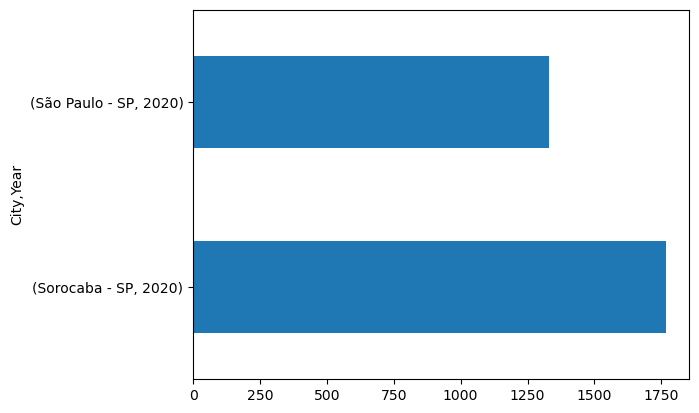

In [44]:
# Filtrar os dados do ano de 2020
tabela_2020 = tabela[tabela['Year'] == 2020]

# Agrupar os dados por cidade e calcular o total de importações
total_importacoes_por_cidade = tabela_2020[['City','Year']].groupby('City').value_counts()

# Classificar as cidades em ordem decrescente
cidades_mais_importaram = total_importacoes_por_cidade.sort_values(ascending=False)

display(cidades_mais_importaram)
cidades_mais_importaram.head(2).plot(kind = 'barh')

### O que as 2 maiores cidades exportaram tanto?

In [36]:
tabela_ano2020 = tabela[tabela['Year']==2020]
citymaior = tabela_ano2020[['City', 'SH2 Description', 'Year']].groupby('City').value_counts()
citymaior = citymaior.sort_values(ascending = False)
display(citymaior)

City                       SH2 Description                                                                Year
Sorocaba - SP              Nuclear reactors, boilers, machinery and mechanical appliances; others         2020    430
Jundiaí - SP               Nuclear reactors, boilers, machinery and mechanical appliances; others         2020    306
Sorocaba - SP              Electrical machinery and equipment and parts thereof; others                   2020    296
São José dos Campos - SP   Electrical machinery and equipment and parts thereof; others                   2020    236
São José dos Pinhais - PR  Nuclear reactors, boilers, machinery and mechanical appliances; others         2020    232
                                                                                                                 ... 
Maracaí - SP               Other made-up textile articles; sets; rags, others                             2020      2
Maracanaú - CE             Salt; sulphur; earths and stone; pla